## Breast Cancer Classification using Logistic Regression and Neural Network

Dataset used: Breast Cancer Dataset from the Sklearn library

In [1]:
# Importing the dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder # Encode the labels
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Data collection - loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [3]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

### Loading the data into a Pandas dataframe

In [4]:
df = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [5]:
# Distribution of the target variable: Diagnosis

#df['diagnosis'].value_counts() # There is an imbalance in the data, but as much

# Adding the target column
df['label'] = breast_cancer_dataset.target

### Exploratory Data Analysis

In [6]:
# Printing the first 5 rows of the dataset
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
# Printing the last 5 rows of the dataset
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [8]:
# Removing the last column as it does not contain any data inplace

#df.drop(columns = "Unnamed: 32", axis = 1, inplace = True)
# To drop a column: Axis = 1
# To drop a row: Axis = 0

In [9]:
df.shape # We have 32 features and 569 samples

(569, 31)

In [10]:
# Removing the column 'id' as it is not necessary for the analysis

#df.drop(columns = "id", axis = 1, inplace = True)

In [11]:
# Encoding the target variable
#label_encoder = LabelEncoder()
#labels = label_encoder.fit_transform(df['diagnosis'])

# Creating a new column for label
#df['target'] = labels

# Dropping the diagnosis column
#df.drop(columns = 'diagnosis', axis = 1, inplace = True)

In [12]:
df.info() # The dataset does not contain any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

The "label" columns is CATEGORICAL has it contains objects which is converted to 0s and 1s to be processed while the other features contain continuous values.

In [13]:
df.isnull().sum() # To find if there are any null values

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [14]:
# Descriptive Statistical measures of the dataset
df.describe() # The fuction is not carried out for the categorical feature

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


*  25% of the dataset has a values less than 11.7 in the radius_mean.
*  50% is the median value - middle value after sorting the value

In some cases the mean > median, **right-skewed or positively-skewed data**.
And we would need to transform the data into a normally distributed data to make sure that the model makes right predictions.


In [15]:
df['label'].value_counts()

# One class has more sample than the other.

,count
label,
1,357
0,212


In [16]:
# Finding the mean values of each feature for both the targets.
df.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


We identify that:
0 -> Benign
1 -> Malignant

The mean values of all the features with the target as Malignant are more than that of the mean with the target as Benign.

## Data Visualisation

* Finding the distribution of the features
*  Checking for outliers in the dataset
*  Correlation between the features

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='label', ylabel='count'>

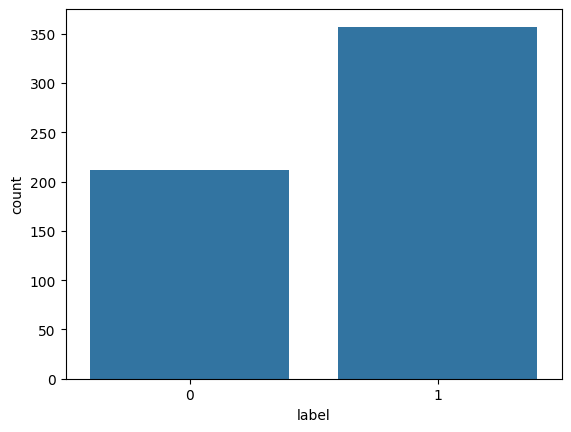

In [18]:
# Countplot for the target column
sns.countplot(x = 'label', data = df)

### Understanding the distribution of features in the dataset

In [19]:
# Getting all the column in the dataset
for column in df:
    print(column)

mean radius
mean texture
mean perimeter
mean area
mean smoothness
mean compactness
mean concavity
mean concave points
mean symmetry
mean fractal dimension
radius error
texture error
perimeter error
area error
smoothness error
compactness error
concavity error
concave points error
symmetry error
fractal dimension error
worst radius
worst texture
worst perimeter
worst area
worst smoothness
worst compactness
worst concavity
worst concave points
worst symmetry
worst fractal dimension
label


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


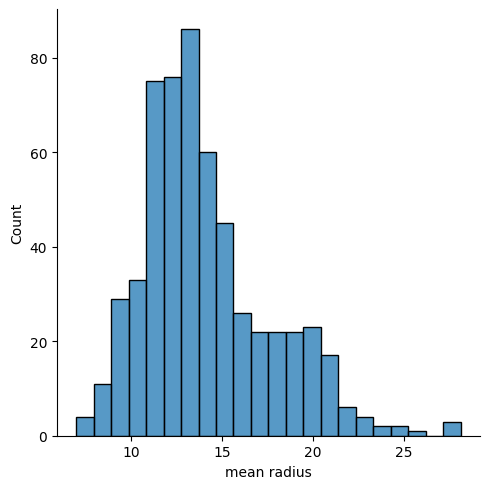

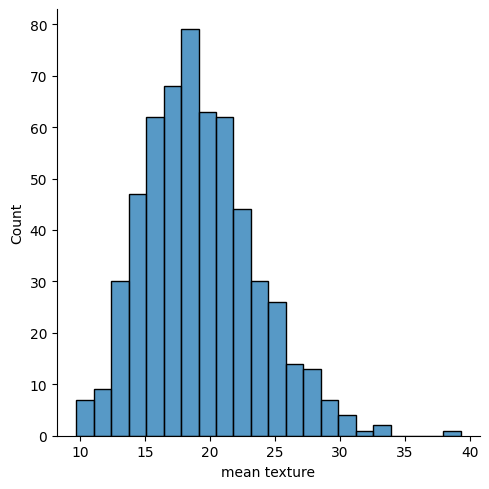

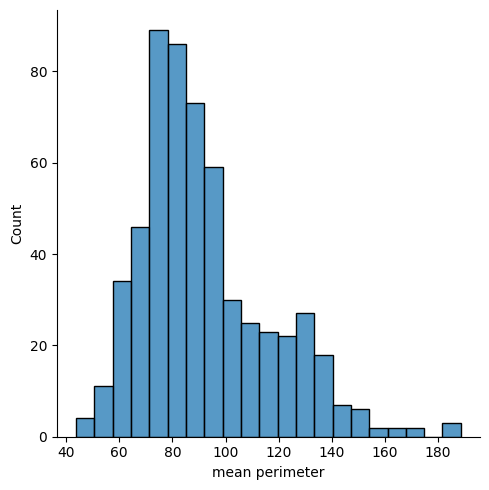

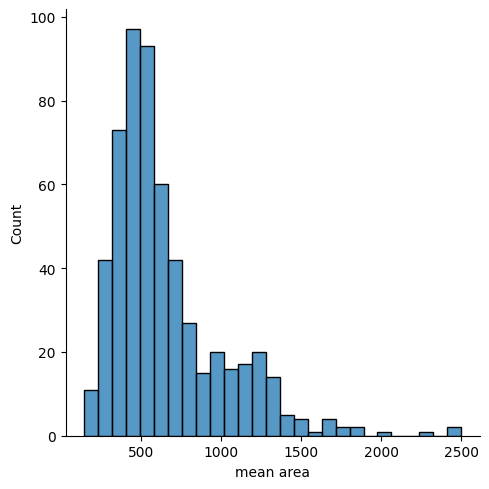

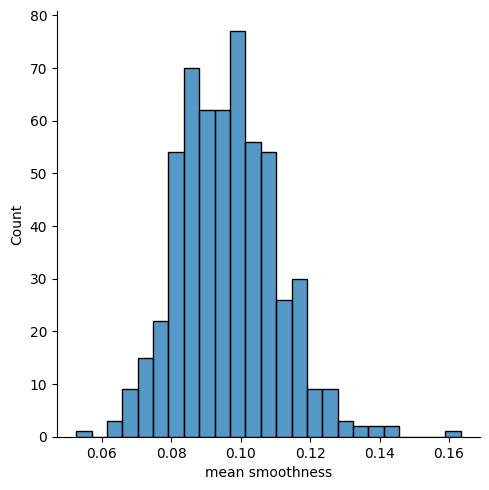

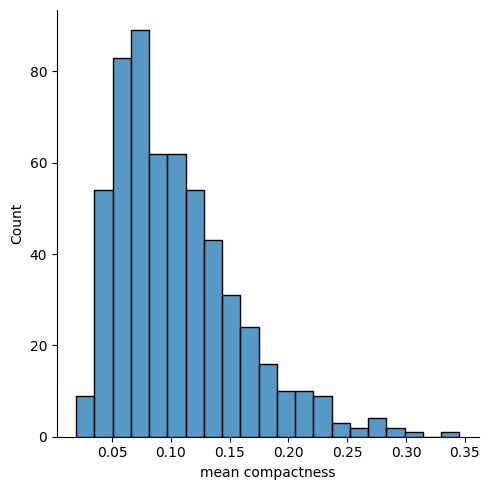

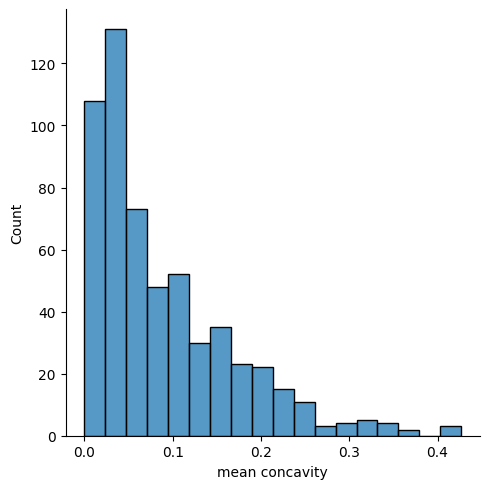

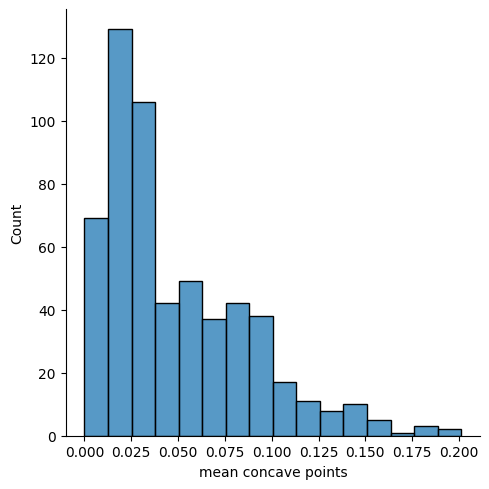

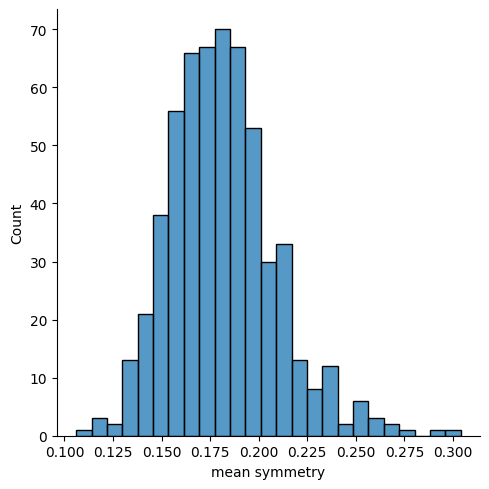

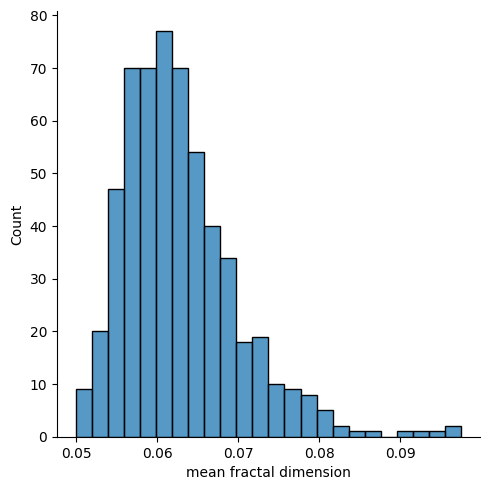

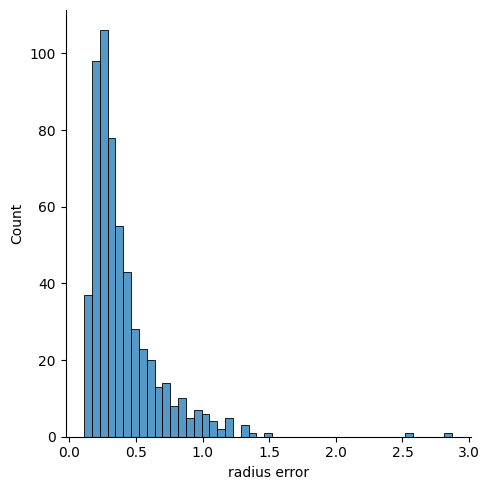

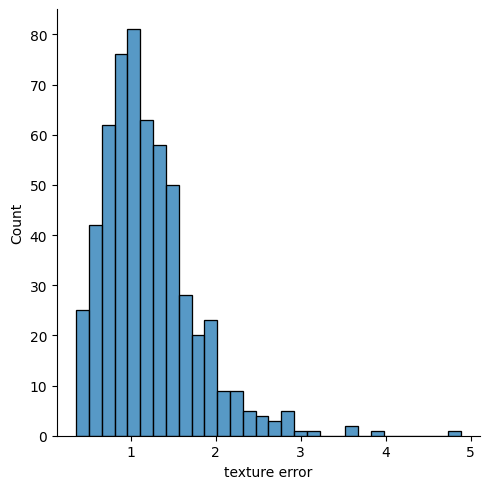

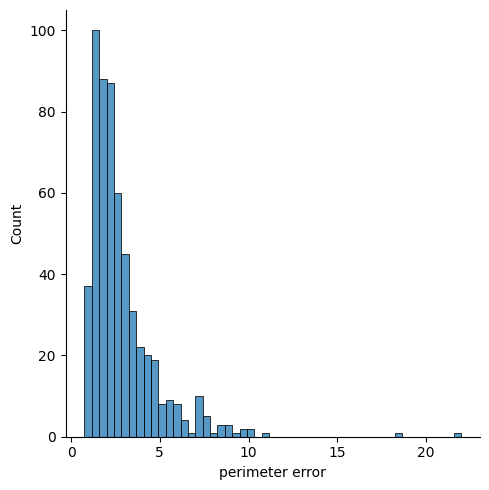

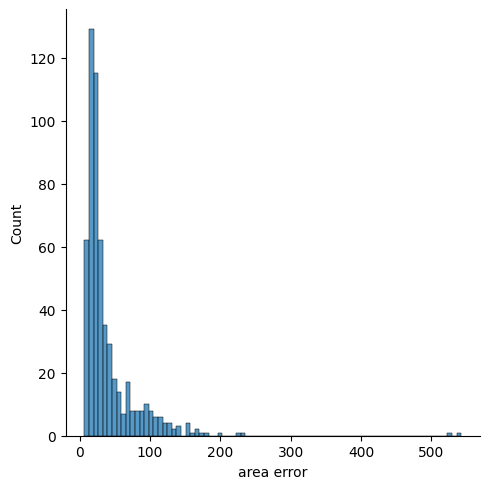

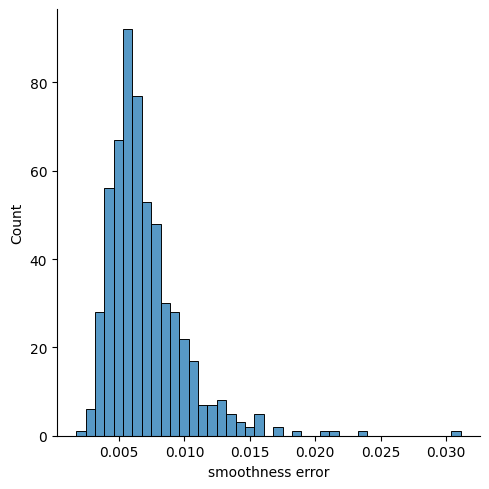

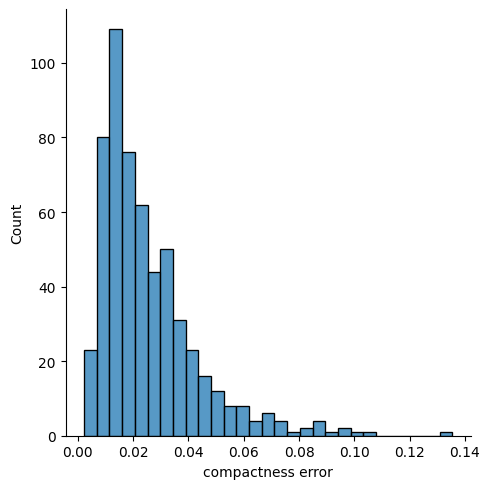

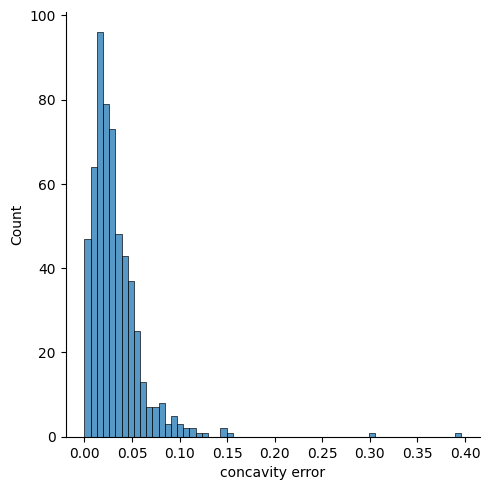

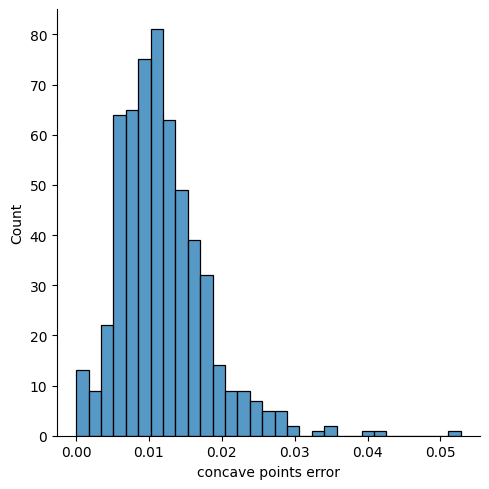

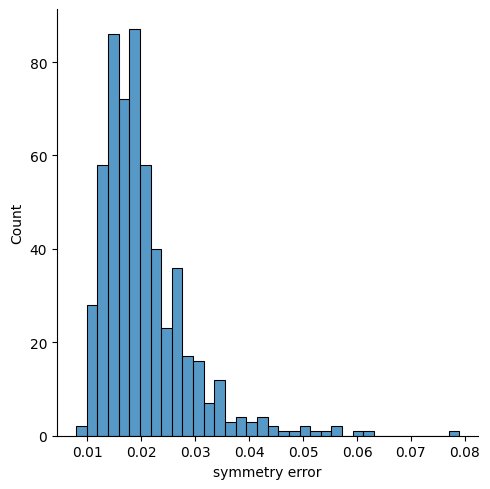

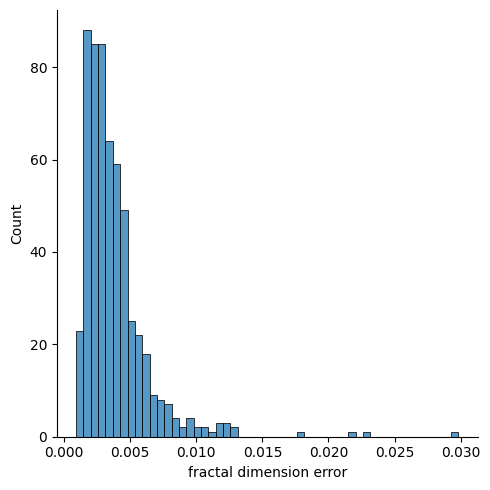

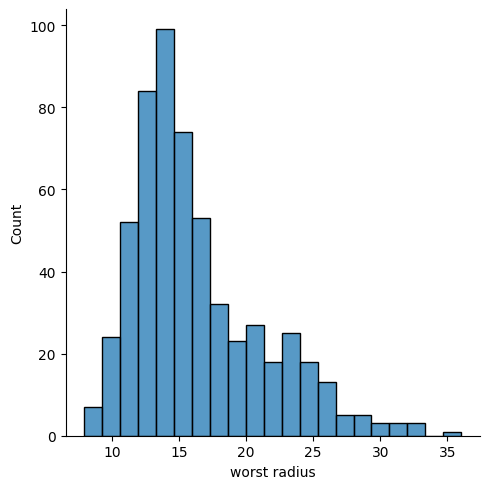

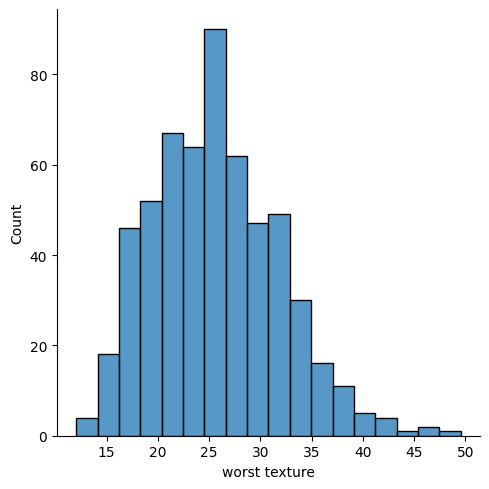

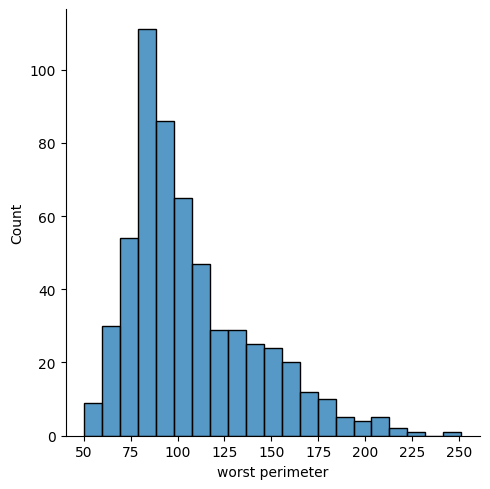

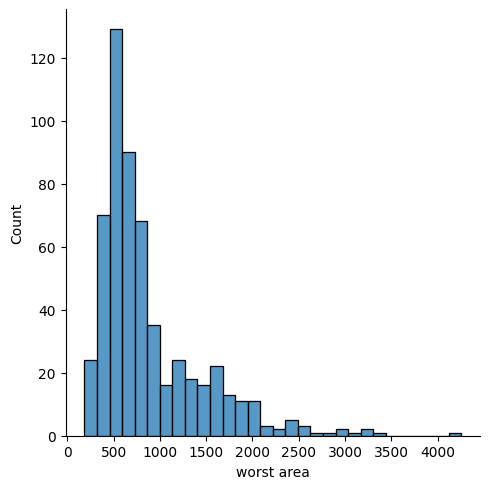

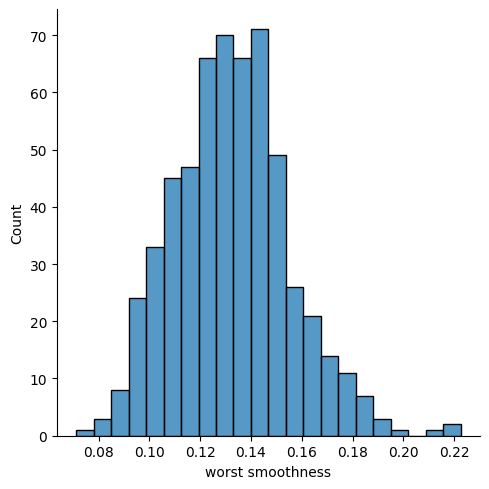

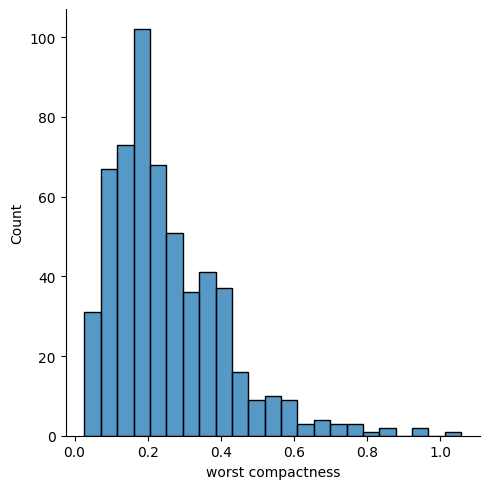

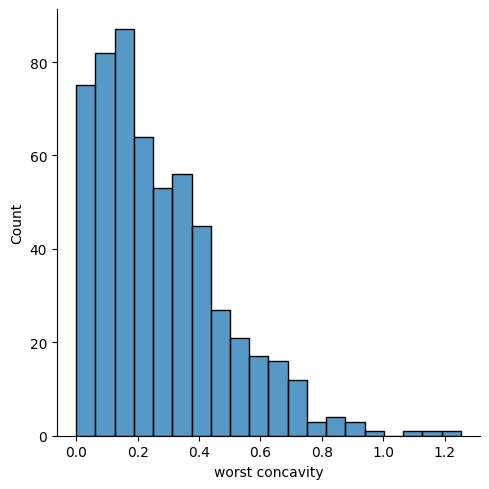

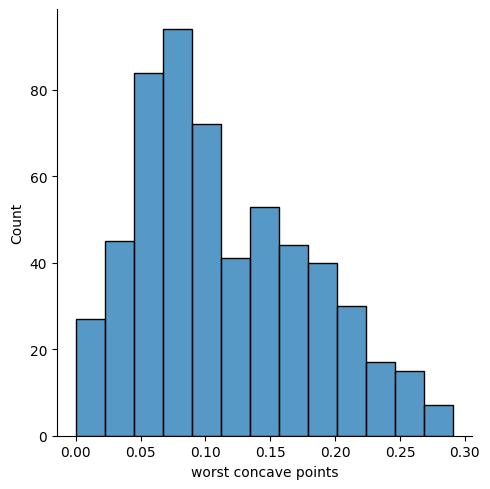

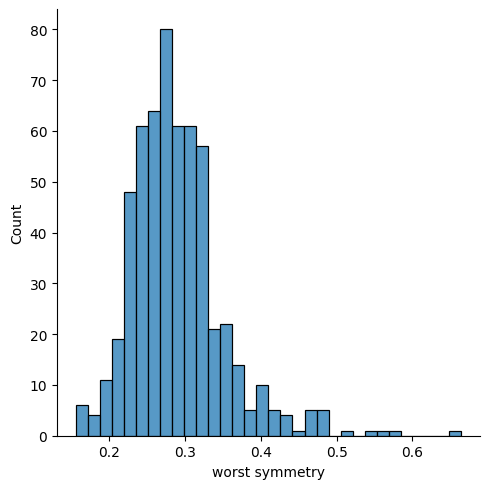

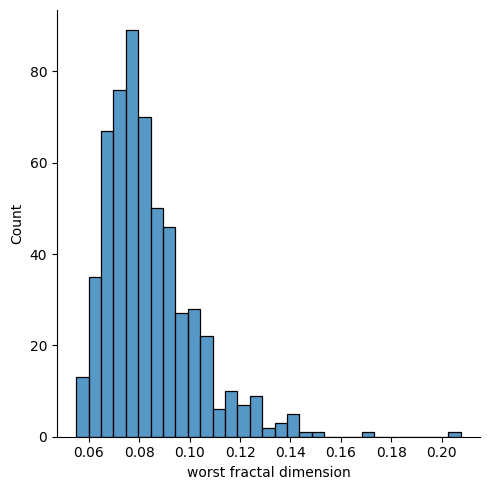

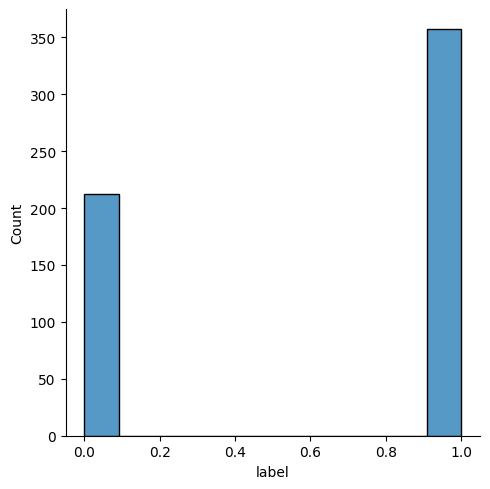

In [20]:
# Univariant analysis - Taking one feature and analysing the distribution at a time
for column in df:
    sns.displot(x = column, data = df)

We can understand the **most of the features are positively skewed**. IE, the mean is greater the median, meaning we have more samples for one condition and less data in the other leading to a case where the model finds it difficult to make predictions for the regions where it has less data in.

<ipython-input-21-df84fe73072b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df['mean radius'])


<Axes: ylabel='Density'>

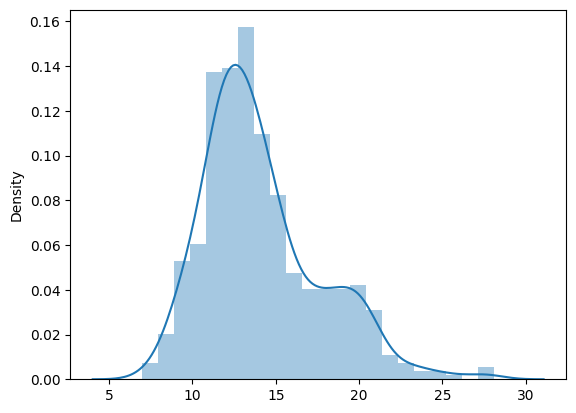

In [21]:
sns.distplot(x = df['mean radius'])

In [22]:
# Finding correlation between the features - Bi-variate analysis
# sns.pairplot(df)

# Generate 30*30 graphs - Time consuming

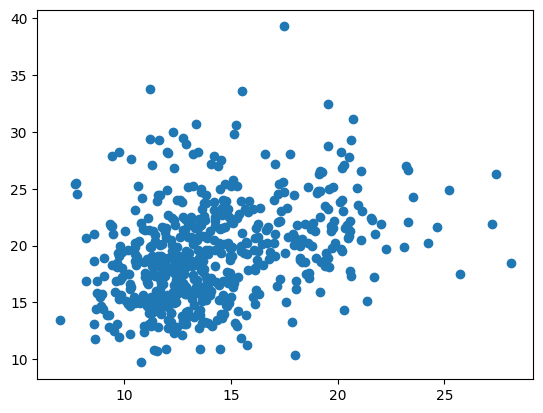

In [23]:
# Making a pairplot for 2 featuers

first_feature = df.iloc[:, 0]
second_feature = df.iloc[:,1]

plt.scatter(x = first_feature, y = second_feature)

### Outlier Detection

An observation that lies an abnormal distance from other values in a random sample from a population.

Regression models are sensitive to outliers and are needed to be processed.

<ipython-input-24-be0ffa52dc02>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (5,5))


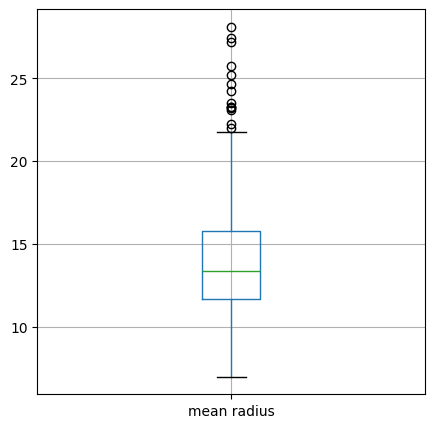

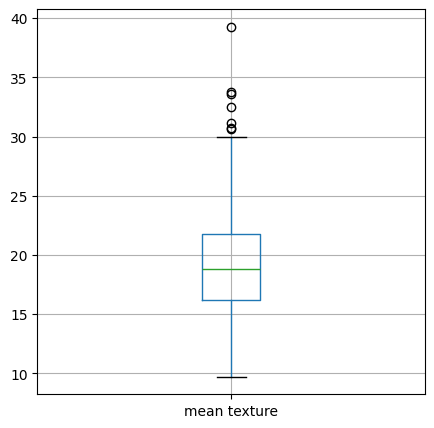

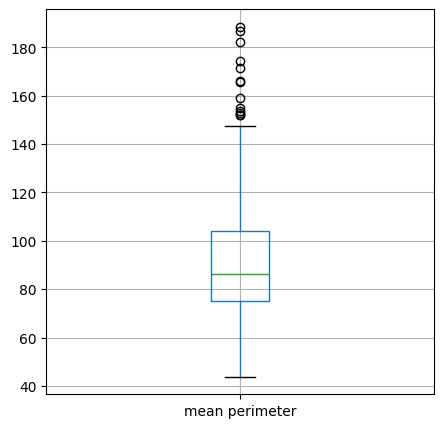

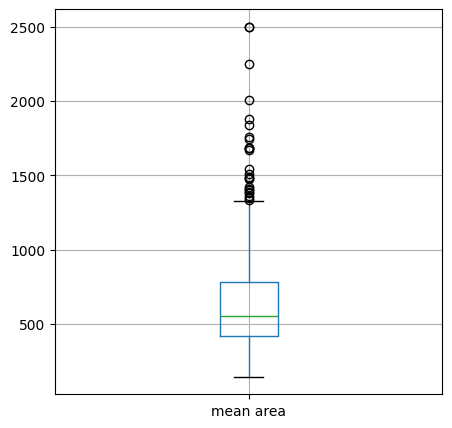

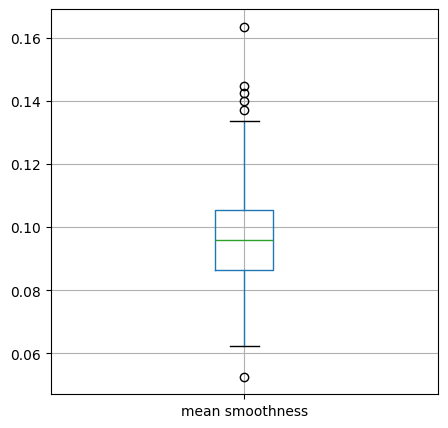

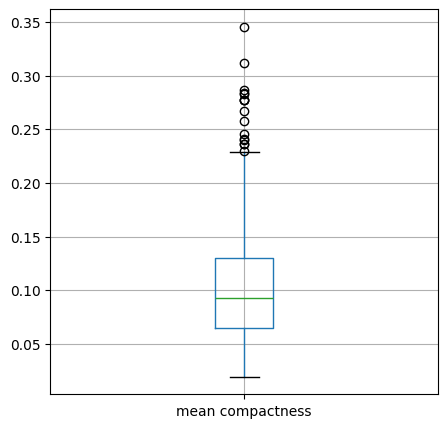

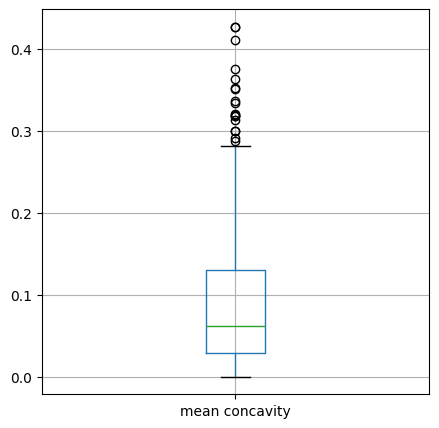

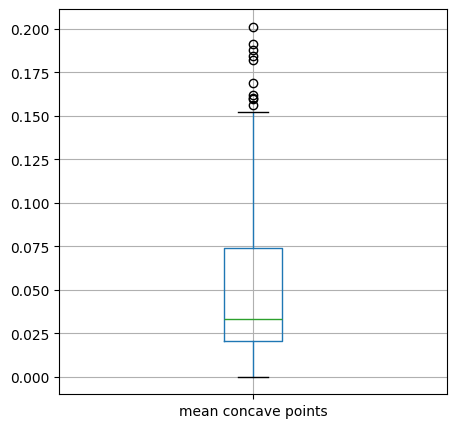

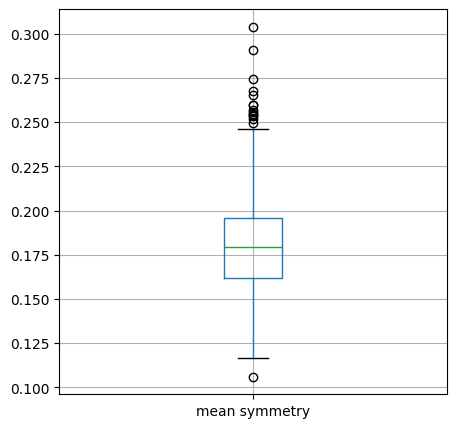

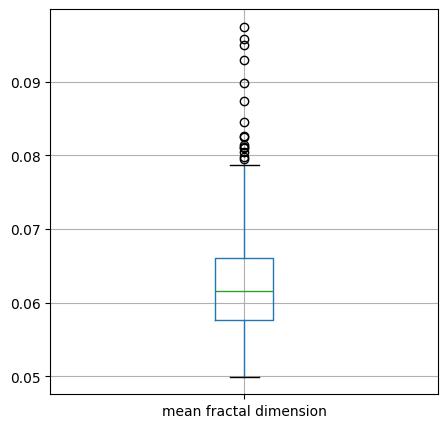

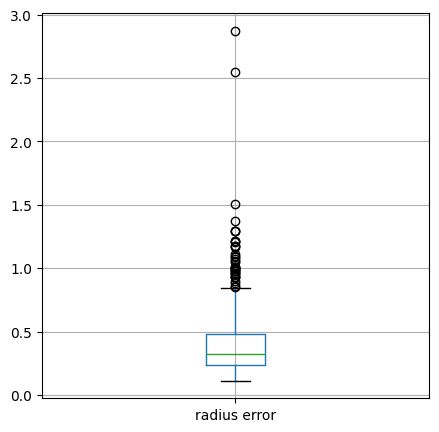

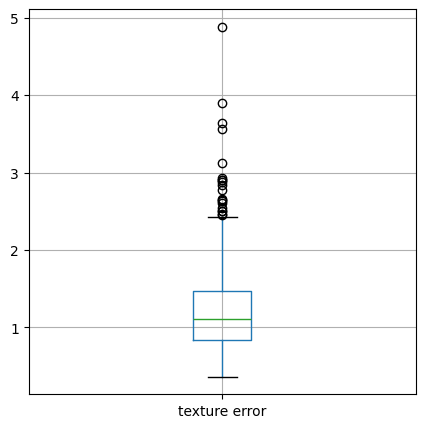

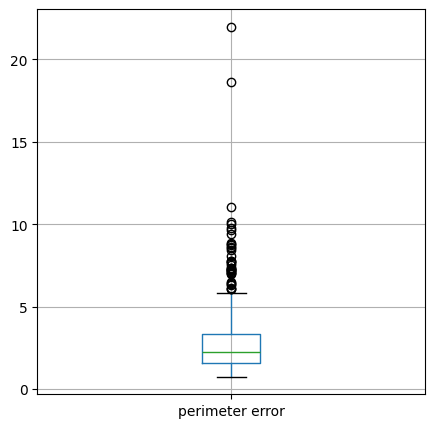

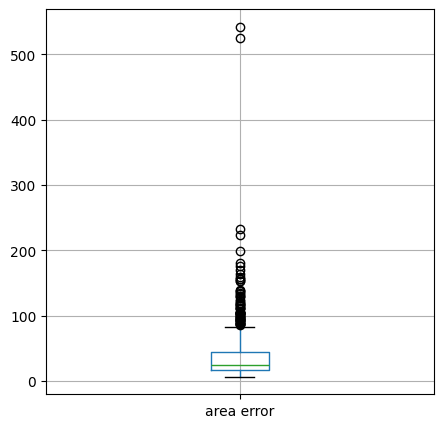

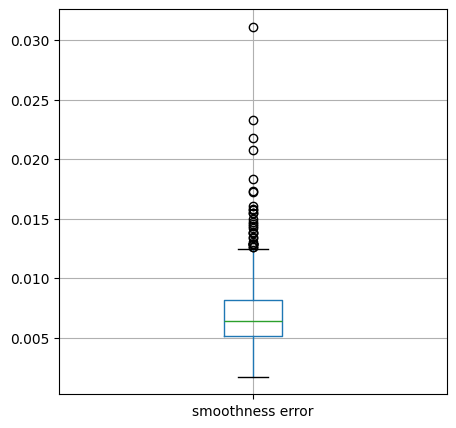

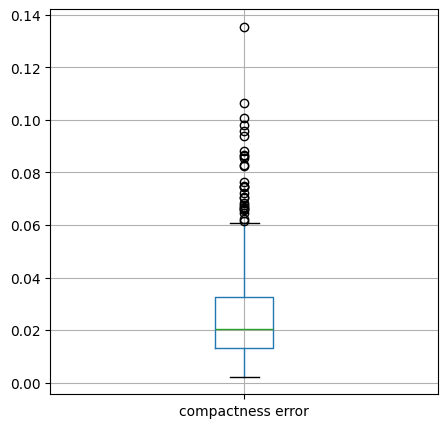

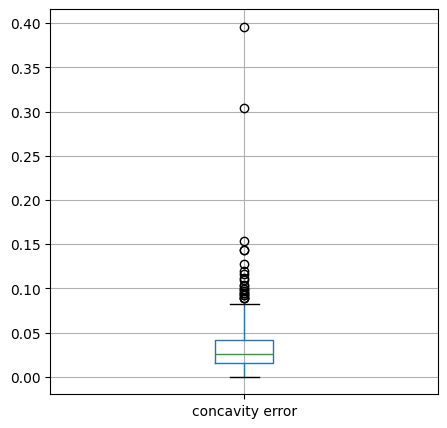

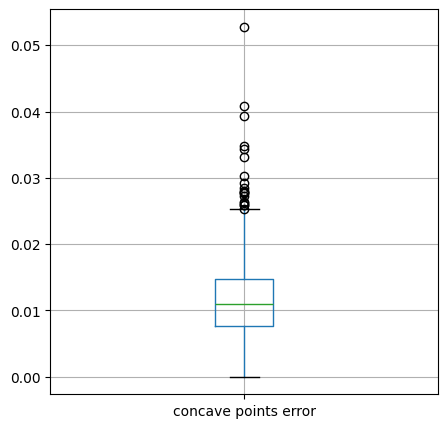

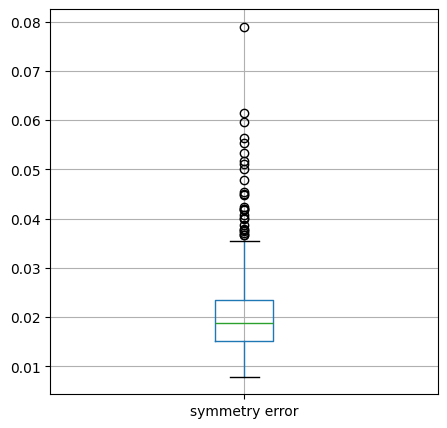

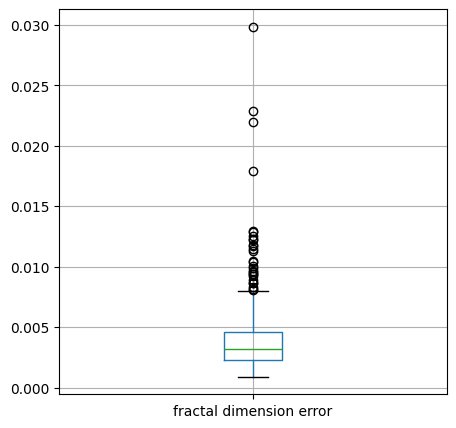

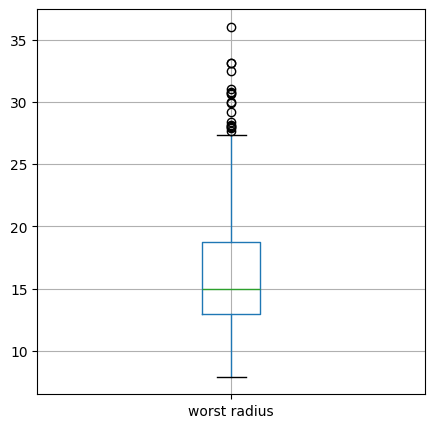

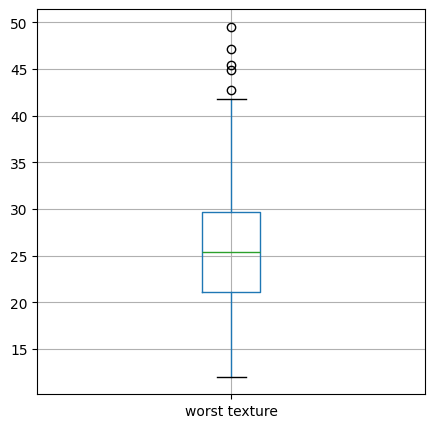

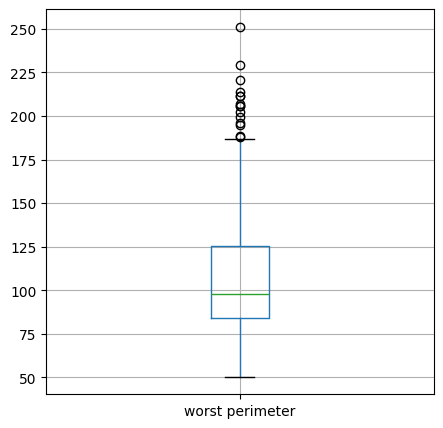

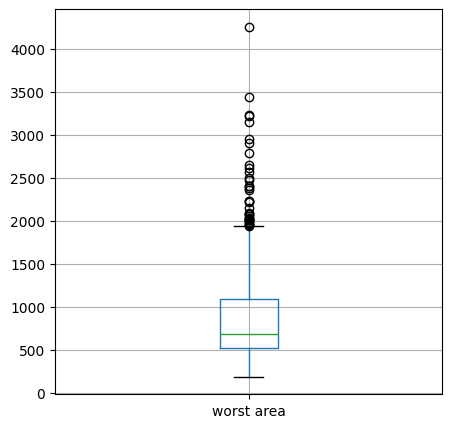

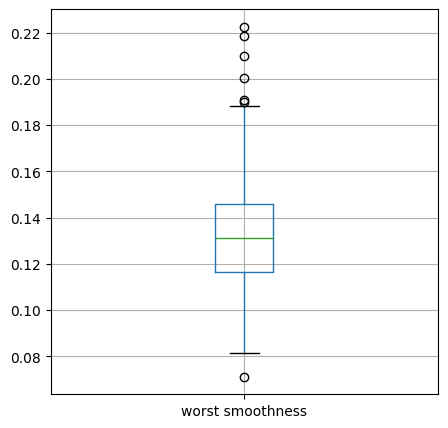

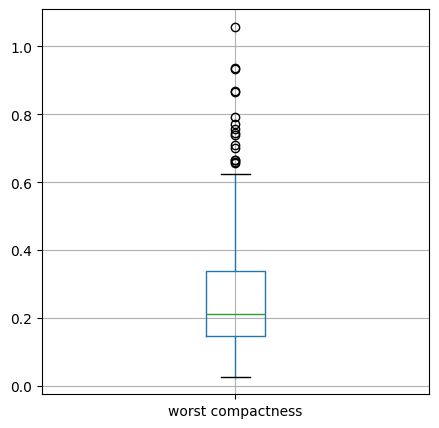

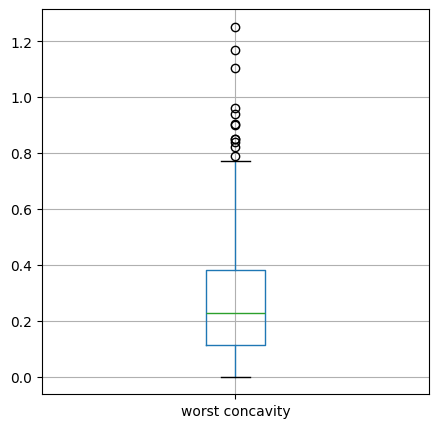

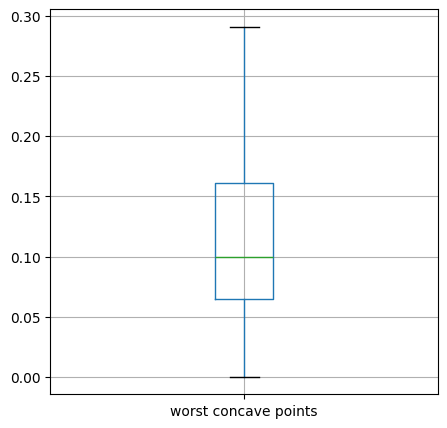

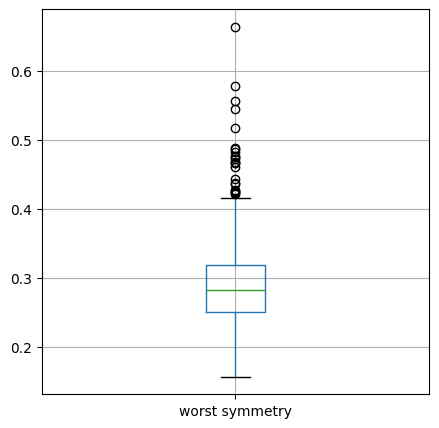

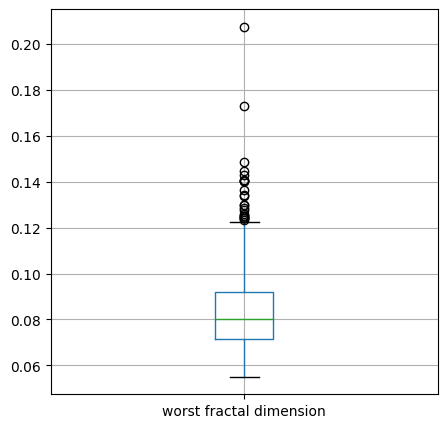

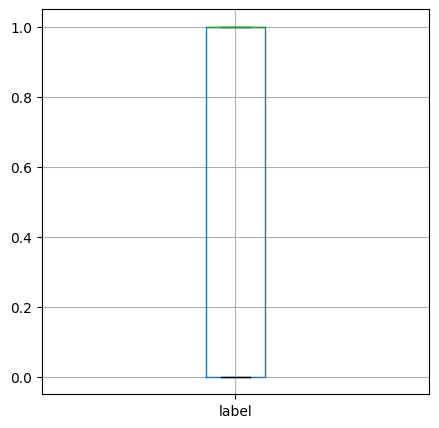

In [24]:
# Box and Whisker plot
for column in df:
    plt.figure(figsize = (5,5))
    df.boxplot([column])

# The black circle represents the outliers, with the blue horizontal lines representing the 25th(Q1) and 75th(Q3) percentile. The green line(Q2) represents the median.
# The black horizontal line are the minimum and maximum values
# Q3 - Q1 is the interquantile range
# Values that lie above 1.5 times the inter-quantile range are the outliers.

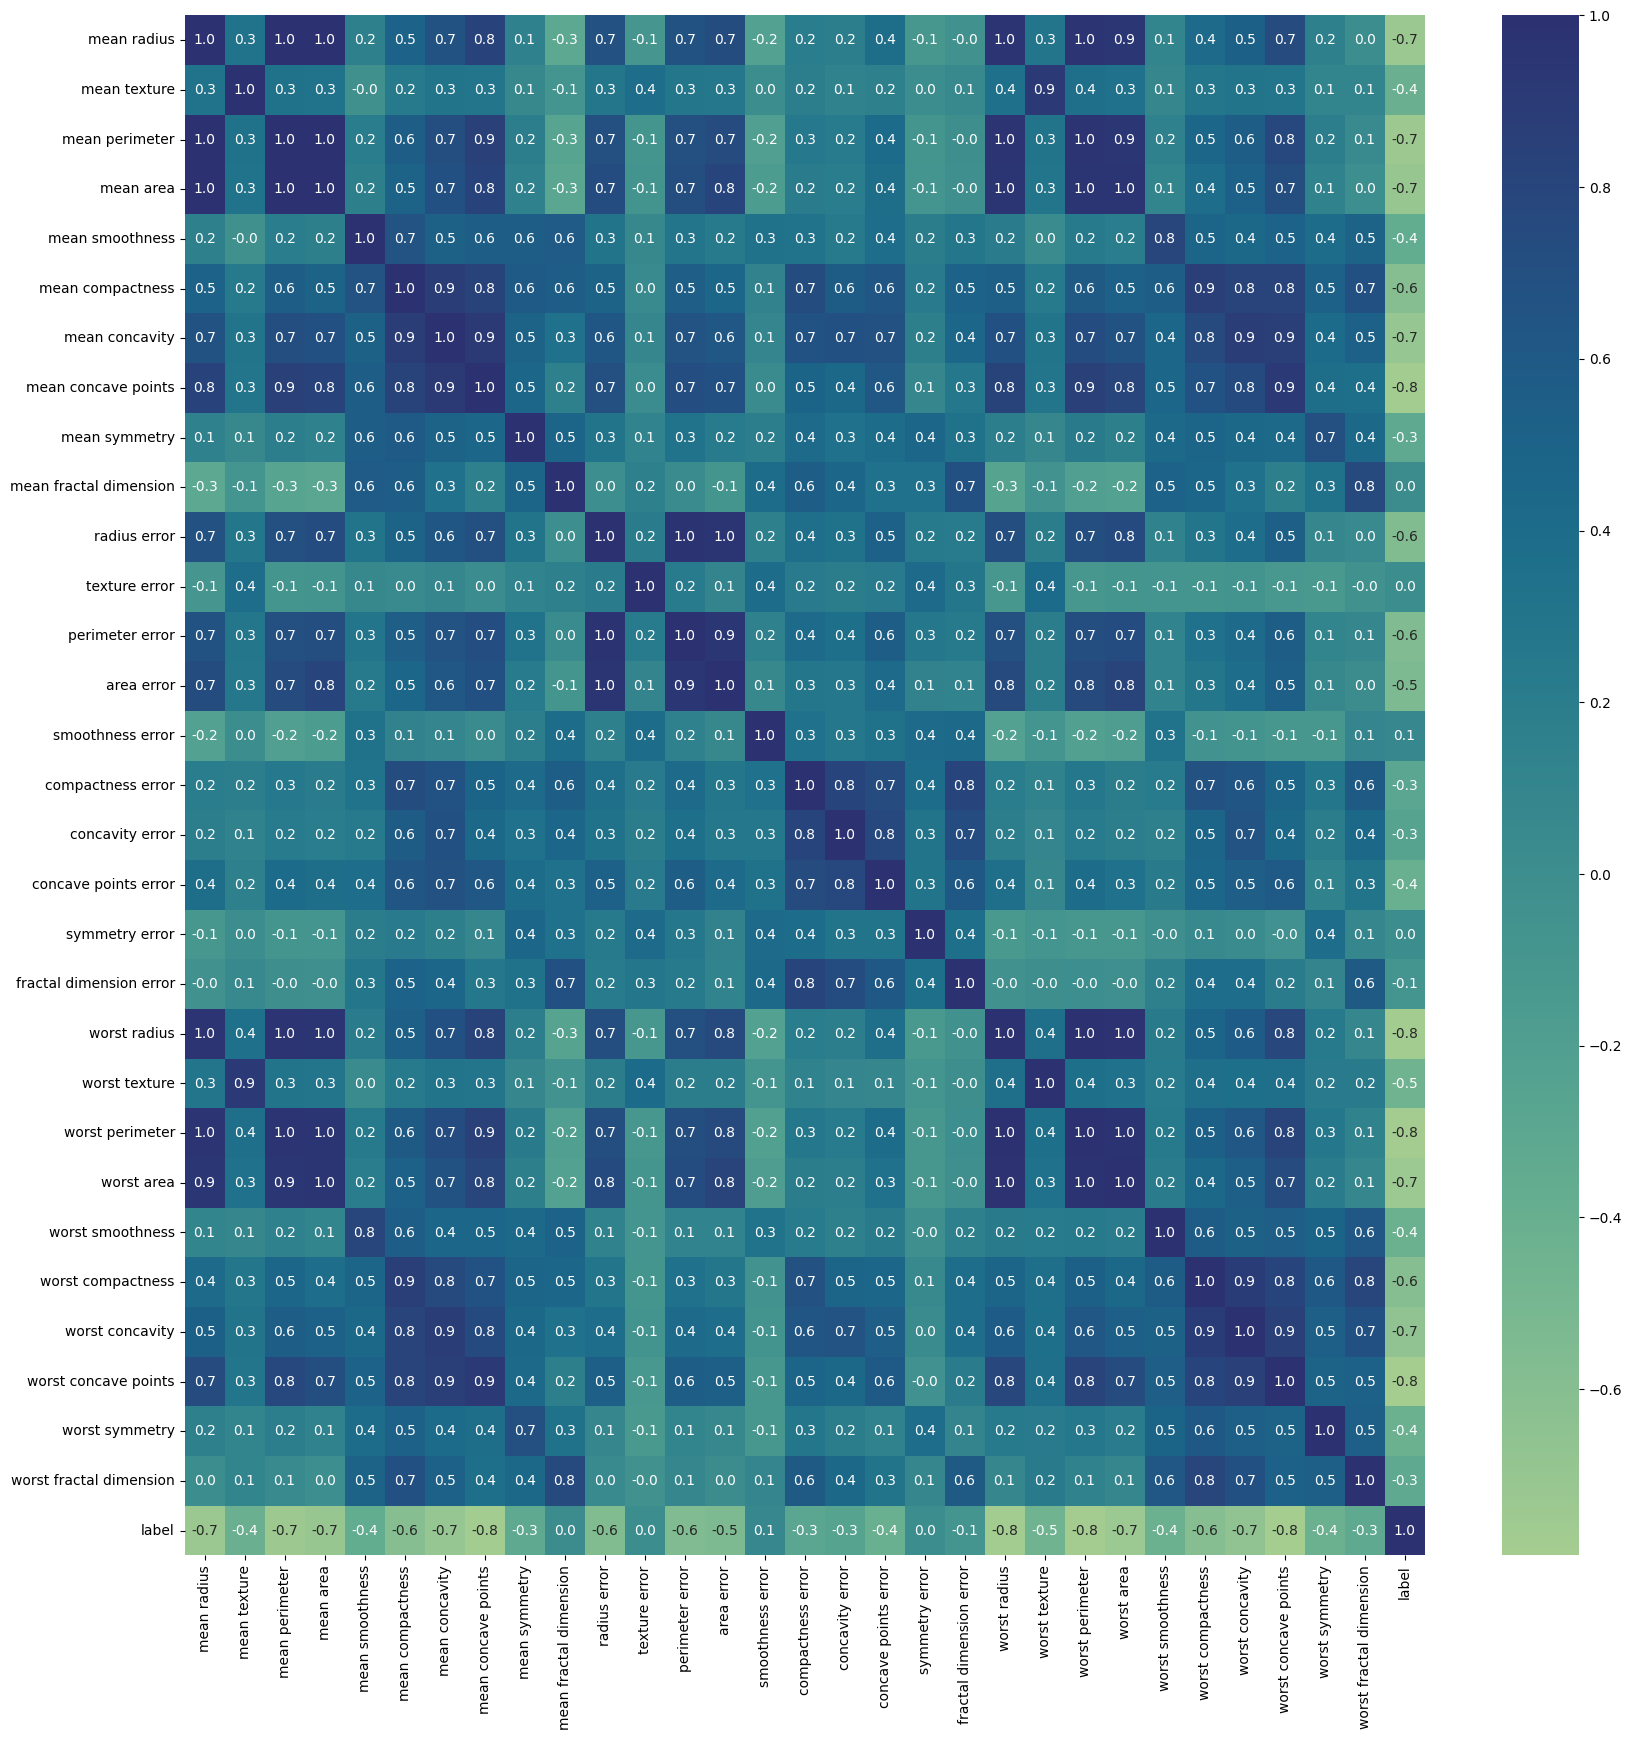

In [25]:
# When using dataset such as this to model a regression model, the outliers need to be replaced.
# We replace them using the median(more)/mean(less) value.

correlation_matrix = df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(correlation_matrix, cbar = True, fmt = '.1f', annot = True, cmap = 'crest')

# Saving the image
plt.savefig('correlation_matrix.png')

**Observation**:
The correlation matrix shows the relationships between different features (variables) in a dataset. The diagonal values of the matrics are always 1, as each feature is perfectly correlated with itself.

**Correlation Coefficients**: Values range between -1 and +1:

+1: Perfect positive correlation (as one feature increases, the other increases proportionally).
-1: Perfect negative correlation (as one feature increases, the other decreases proportionally).
0: No correlation (features are independent).

**Feature Relationships**:
Identifing the highly correlated features (positive or negative). Features with high correlation (close to +1 or -1) may be redundant.
Detect multicollinearity, where independent variables are highly correlated with one or more variables, which can affect the performance of models like regression.

**Feature Selection**: Remove redundant features with high correlation to simplify models and improve efficiency

In [26]:
# Separating the features and target

X = df.drop(columns = 'label', axis = 1)
y = df['label']

In [27]:
# Splitting data into training and testing data
# 80% - Training data
# 20% - Testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [29]:
print(y_train.shape, y_test.shape)

(455,) (114,)


### Training a Logistic Regression Model

In [30]:
model = LogisticRegression()

# Training the model using Training
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
# Model evaluation - Accuracy on training data

train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
print("The Training accuracy: ", train_accuracy)

The Training accuracy:  0.9472527472527472


In [32]:
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("The test accuracy: ", test_accuracy)

The test accuracy:  0.956140350877193


Predictive System

In [33]:
input_data = (19.81, 22.15, 130, 1260, 0.09831, 0.1027, 0.1479, 0.09498, 0.1582, 0.05395, 0.7582, 1.017, 5.865, 112.4, 0.006494, 0.01893, 0.03391, 0.01521, 0.01356, 0.001997, 27.32, 30.88, 186.8, 2398, 0.1512, 0.315, 0.5372, 0.2388, 0.2768, 0.07615)
input_array = np.asarray(input_data)

# Reshaping the data
input_array_reshaped = input_array.reshape(1, -1)

prediction = model.predict(input_array_reshaped)
print(prediction)

if prediction[0] == 0:
    print("The patient is Benign")
else:
    print("The patient is Malignant")

[0]
The patient is Benign


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Building a Neural Network

In [34]:
# Standarise the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)
X_test_standard = scaler.transform(X_test)

In [60]:
file_name = "scaler.pkl"

with open(file_name, 'wb') as f:
    pickle.dump(scaler, f)

loaded_scaler = pickle.load(open(file_name, 'rb'))

In [35]:
import tensorflow as tf
# Setting seed
tf.random.set_seed(3) # For reproducability

from tensorflow import keras

In [36]:
X.shape

(569, 30)

In [37]:
# Setting the layers for the neural network

model = keras.Sequential([
                            keras.layers.Flatten(input_shape = (30,)), # layer 1 - input layer
                            keras.layers.Dense(20, activation = 'relu'),  # layer 2 - hidden layer with 20 neurons
                            keras.layers.Dense(2, activation = 'sigmoid')  # layer 3 - output layer
])

# The input is Flattened to a single dimensional array
# Dense means that all the neurons in the particular layer is connected to all the neurons in the previous layer.
# Number of neurons in the output layer should be equal to the number of class in the Target.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
# Compiling the neural network

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy', # Label encoding
              metrics = ['accuracy']
              )

In [39]:
# Training the neural network

history = model.fit(X_train_standard, y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.3149 - loss: 0.8979 - val_accuracy: 0.4783 - val_loss: 0.7668
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5433 - loss: 0.6553 - val_accuracy: 0.6304 - val_loss: 0.5918
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7564 - loss: 0.5050 - val_accuracy: 0.8043 - val_loss: 0.4722
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8822 - loss: 0.4030 - val_accuracy: 0.8478 - val_loss: 0.3855
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9225 - loss: 0.3293 - val_accuracy: 0.9348 - val_loss: 0.3209
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9337 - loss: 0.2735 - val_accuracy: 0.9348 - val_loss: 0.2725
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9489 - loss: 0.2308 - val_accuracy: 0.9565 - val_loss: 0.2362
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9521 - loss: 0.1987 - val_accuracy: 0.9565 - v

We can observe that at each epoch, the accuracy score is increasing and the loss is decreasing.

=> Loss function and accuracy are inversely proportional.

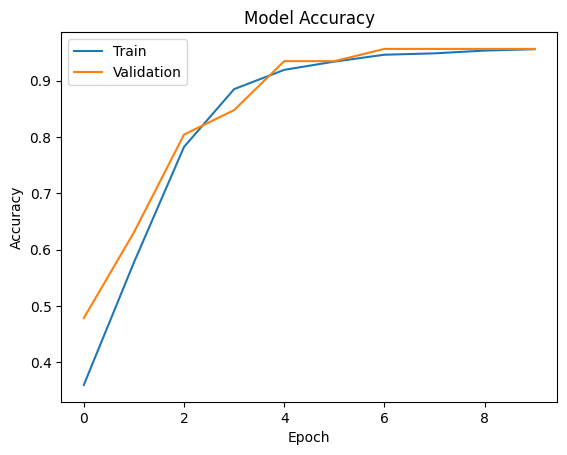

In [40]:
# Plotting the accuracy and loss

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

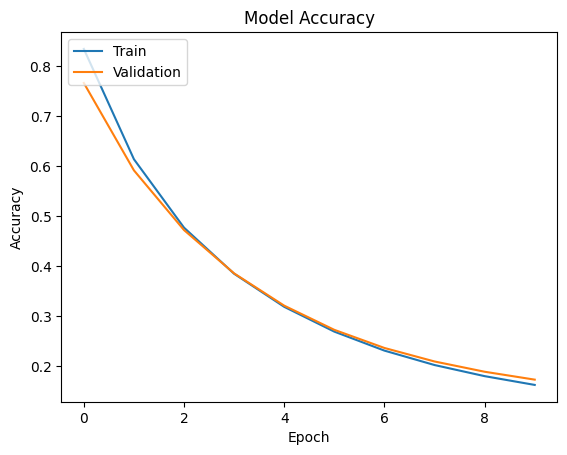

In [41]:
# Plotting the accuracy and loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

In [42]:
# Accuracy of the model with the test data

# The model uses the test data to find y_pred(Prediction) and compares it with y_test(True Value) and gives us the loss value and accuracy
loss, accuracy = model.evaluate(X_test_standard, y_test)
print(accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9554 - loss: 0.1513 
0.9561403393745422


In [43]:
print(X_test_standard.shape)
print("\nThe first sample is:")
print(X_test_standard[0])

(114, 30)

The first sample is:
[-0.46649743 -0.13728933 -0.44421138 -0.48646498  0.28085007  0.04160589
 -0.11146496 -0.26486866  0.41524141  0.13513744 -0.02091509 -0.29323907
 -0.17460869 -0.2072995  -0.01181432 -0.35108921 -0.1810535  -0.24238831
 -0.33731758 -0.0842133  -0.2632354  -0.14784208 -0.33154752 -0.35109337
  0.48001942 -0.09649594 -0.03583041 -0.19435087  0.17275669  0.20372995]


In [44]:
y_pred = model.predict(X_test_standard) # gives the probability of each class
print(y_pred.shape)
print("The prediction for the first sampleis:", y_pred[0])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
(114, 2)
The prediction for the first sampleis: [0.38309783 0.6550869 ]


The model has 2 columns, the probablities of the datapoint being in each of the classes, meaning the model is 23.5% sure that the datapoint is Malignant and 60.1% sure that it is Benign.

In [45]:
print(y_pred)

[[3.83097827e-01 6.55086875e-01]
 [9.47355986e-01 1.02382496e-01]
 [6.73776567e-01 2.69652426e-01]
 [4.07494158e-01 8.25817049e-01]
 [3.76280546e-01 8.53387356e-01]
 [9.87395346e-01 1.08685507e-03]
 [9.91379619e-01 3.07109021e-03]
 [8.34703386e-01 2.77216673e-01]
 [4.54688281e-01 5.51928759e-01]
 [5.12760103e-01 9.22991216e-01]
 [6.02819204e-01 9.16682363e-01]
 [6.97086692e-01 3.68275046e-01]
 [6.19463325e-01 9.27023351e-01]
 [6.80575073e-01 5.03069699e-01]
 [2.60155976e-01 9.12592113e-01]
 [9.07126367e-01 1.15711242e-01]
 [4.55538720e-01 9.24127698e-01]
 [3.73591274e-01 9.66115952e-01]
 [1.74153611e-01 9.83735323e-01]
 [9.48609293e-01 1.24940500e-02]
 [4.04337108e-01 6.47150040e-01]
 [3.98367822e-01 8.77175927e-01]
 [9.87221360e-01 3.50775430e-03]
 [4.30036336e-01 9.70538437e-01]
 [5.36750019e-01 8.98048460e-01]
 [4.25497800e-01 9.16460335e-01]
 [3.73880088e-01 8.46721411e-01]
 [4.47530061e-01 7.06643164e-01]
 [4.31004196e-01 8.69614542e-01]
 [9.68943655e-01 5.34284264e-02]
 [4.718251

If the first value is greater, then the output is 0. If the second value is greater then, the label is 1.

In [46]:
# Converting the probabilities into labels

y_labels = [np.argmax(i) for i in y_pred]
print(y_labels)

[1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0]


### Building a Predictive System

In [47]:
input_data = (19.81, 22.15, 130, 1260, 0.09831, 0.1027, 0.1479, 0.09498, 0.1582, 0.05395, 0.7582, 1.017, 5.865, 112.4, 0.006494, 0.01893, 0.03391, 0.01521, 0.01356, 0.001997, 27.32, 30.88, 186.8, 2398, 0.1512, 0.315, 0.5372, 0.2388, 0.2768, 0.07615)

# Converting the input data into numpy array
input_array = np.asarray(input_data)

# reshaping the input array
input_array_reshaped = input_array.reshape(1, -1)

# Standardise the input data
input_data_standard = scaler.transform(input_array_reshaped)

# Making the prediction
prediction = model.predict(input_data_standard)
print(prediction)
label = [np.argmax(prediction)]
print(label)

if label[0] == 0:
    print("The patient is Benign")
else:
    print("The patient is Malignant")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[0.9794416  0.01034754]]
[0]
The patient is Benign


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Achieving 95% accuracy in a medical diagnosis task like breast cancer classification is highly significant. It means the model can correctly predict whether a tumor is malignant or benign in 95 out of 100 cases.

This level of accuracy can assist doctors in making more informed decisions, potentially reducing the number of false positives (benign tumors classified as malignant) and false negatives (malignant tumors classified as benign).

# Saving the trained model to create an interface

In [55]:
import pickle
from tensorflow.keras.models import save_model, load_model

filename = "breast_cancer_model.h5"

# Saving the ols (linear regression) - best performing model on to the file
# pickle.dump(model, open(filename, 'wb')) # wb - write binary (format)
save_model(model, filename)

# loading the saved model
# loaded_model = pickle.load(open(filename, 'rb')) # rb - read binary
loaded_model = load_model(filename) # rb - read binary

In [56]:
input_data = (19.81, 22.15, 130, 1260, 0.09831, 0.1027, 0.1479, 0.09498, 0.1582, 0.05395, 0.7582, 1.017, 5.865, 112.4, 0.006494, 0.01893, 0.03391, 0.01521, 0.01356, 0.001997, 27.32, 30.88, 186.8, 2398, 0.1512, 0.315, 0.5372, 0.2388, 0.2768, 0.07615)

# Converting the input data into numpy array
input_array = np.asarray(input_data)

# reshaping the input array
input_array_reshaped = input_array.reshape(1, -1)

# Standardise the input data
input_data_standard = scaler.transform(input_array_reshaped)

# Making the prediction
prediction = loaded_model.predict(input_data_standard)
print(prediction)
label = [np.argmax(prediction)]
print(label)

if label[0] == 0:
    print("The patient is Benign")
else:
    print("The patient is Malignant")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
[[0.9794416  0.01034754]]
[0]
The patient is Benign
